### Problem Statement 1:
Is gender independent of education level? A random sample of 395 people were surveyed and each person was asked to report the highest education level they obtained. The data that resulted from the survey is summarized in the following table:
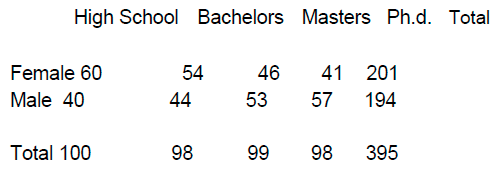
Question: Are gender and education level dependent at 5% level of significance? In other words, given the data collected above, is there a relationship between the gender of an individual and the level of education that they have obtained?

In [13]:
import numpy as np
from scipy import stats
import scipy.stats as st
from scipy.stats.distributions import chi2

In [3]:
def compute_expected(val1,val2,total):
    expected = (val1*val2)/total
    return expected

In [7]:
#observed values
o_hs_f = 60
o_hs_m = 40

o_bachelors_f = 54
o_bachelors_m = 44

o_masters_f = 46
o_masters_m = 53

o_phd_f = 41
o_phd_m = 57

all_female = o_hs_f+o_bachelors_f+o_masters_f+o_phd_f
all_male = o_hs_m+o_bachelors_m+o_masters_m+o_phd_m

all_hs = o_hs_f+o_hs_m
all_bachelors = o_bachelors_f + o_bachelors_m
all_masters = o_masters_f + o_masters_m
all_phd = o_phd_f + o_phd_m


total = o_hs_f + o_hs_m + o_bachelors_f + o_bachelors_m + o_masters_f + o_masters_m + o_phd_f + o_phd_m

In [4]:
#compute expected values
e_hs_f = compute_expected(all_female,all_hs,total)
e_hs_m = compute_expected(all_male,all_hs,total)

e_bachelors_f = compute_expected(all_female,all_bachelors,total)
e_bachelors_m = compute_expected(all_male,all_bachelors,total)

e_masters_f = compute_expected(all_female,all_masters,total)
e_masters_m = compute_expected(all_male,all_masters,total)

e_phd_f = compute_expected(all_female,all_phd,total)
e_phd_m = compute_expected(all_male,all_phd,total)

In [8]:
observed = [o_hs_f,o_hs_m,o_bachelors_f,o_bachelors_m,o_masters_f,o_masters_m,o_phd_f,o_phd_m ]
expected = [round(e_hs_f),round(e_hs_m),round(e_bachelors_f),round(e_bachelors_m),round(e_masters_f),round(e_masters_m),round(e_phd_f),round(e_phd_m)]  
    


In [17]:
X = []
for i in range(len(observed)):
    r = ((observed[i] - expected[i])**2)/expected[i]
    X.append(r)
chi_score = np.sum(X)
df = (4-1)

chi_score

7.848660464185674

In [14]:
pval = chi2.sf(chi_score,df)
print("P(X={}) = {}".format(chi_score,pval))

P(X=7.848660464185674) = 0.049245207504531006


In [16]:
alpha=0.05
if(pval>alpha):
    print("Fail to reject H0")
else:
    print("Reject H0")


Reject H0


### Problem Statement 2:
Using the following data, perform a oneway analysis of variance using α=.05. Write up the results in APA format.

[Group1: 51, 45, 33, 45, 67]

[Group2: 23, 43, 23, 43, 45]

[Group3: 56, 76, 74, 87, 56]

In [18]:
import scipy.stats as sts
#The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.
#The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. 
#It essentially answers the question: do any of the group means differ from one another? 

#The scipy library has a function for carrying out one-way ANOVA tests called scipy.stats.f_oneway()

Group1 = [51, 45, 33, 45, 67]
Group2 = [23, 43, 23, 43, 45]
Group3 = [56, 76, 74, 87, 56]

# Perform the ANOVA
statistic, pvalue = sts.f_oneway(Group1,Group2,Group3)
print("F Statistic value {} , p-value {}".format(statistic,pvalue))
if pvalue < 0.05:
    print('True')
else:
    print('False')

F Statistic value 9.747205503009463 , p-value 0.0030597541434430556
True
